Ta-lib

In [4]:
import talib
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
import plotly.express as px
import pyfolio as pf
import pynance as pyn

In [5]:
file_path = "../data/raw_analyst_ratings.csv"
df= pd.read_csv(file_path)

# Display the first few rows
print(df.head())

   Unnamed: 0                                           headline  \
0           0            Stocks That Hit 52-Week Highs On Friday   
1           1         Stocks That Hit 52-Week Highs On Wednesday   
2           2                      71 Biggest Movers From Friday   
3           3       46 Stocks Moving In Friday's Mid-Day Session   
4           4  B of A Securities Maintains Neutral on Agilent...   

                                                 url          publisher  \
0  https://www.benzinga.com/news/20/06/16190091/s...  Benzinga Insights   
1  https://www.benzinga.com/news/20/06/16170189/s...  Benzinga Insights   
2  https://www.benzinga.com/news/20/05/16103463/7...         Lisa Levin   
3  https://www.benzinga.com/news/20/05/16095921/4...         Lisa Levin   
4  https://www.benzinga.com/news/20/05/16095304/b...         Vick Meyer   

                        date stock  
0  2020-06-05 10:30:54-04:00     A  
1  2020-06-03 10:45:20-04:00     A  
2  2020-05-26 04:30:07-04:00 

Load and prepare the data.

In [6]:
stocks = ['AA' ]

for stock in stocks:
    # Download historical stock data
    stock_data = yf.download(stock, period='max')

    # Get the earliest and latest dates available for the stock
    earliest_date = stock_data.index.min().strftime('%Y-%m-%d')
    latest_date = stock_data.index.max().strftime('%Y-%m-%d')

    print(f"{stock}: Earliest Date - {earliest_date}, Latest Date - {latest_date}")

    # Fetch stock prices for the defined period
    stock_prices = yf.download(stock, start=earliest_date, end=latest_date)

    print(stock_prices)

[*********************100%%**********************]  1 of 1 completed


AA: Earliest Date - 1962-01-02, Latest Date - 2024-05-03


[*********************100%%**********************]  1 of 1 completed

                 Open       High        Low      Close  Adj Close   Volume
Date                                                                      
1962-01-02   0.000000   6.583219   6.545672   6.545672   1.506891    55930
1962-01-03   6.545672   6.645797   6.533156   6.645797   1.529942    74906
1962-01-04   6.645797   6.695859   6.645797   6.645797   1.529942    80899
1962-01-05   6.645797   6.683344   6.620766   6.633281   1.527060    70911
1962-01-08   6.608250   6.608250   6.357938   6.408000   1.475197    93883
...               ...        ...        ...        ...        ...      ...
2024-04-26  36.509998  37.389999  36.230000  36.880001  36.880001  5653300
2024-04-29  36.880001  38.200001  36.650002  37.650002  37.650002  5667100
2024-04-30  36.759998  36.919998  35.110001  35.139999  35.139999  7993000
2024-05-01  35.200001  35.470001  33.880001  34.250000  34.250000  8382000
2024-05-02  34.110001  35.974998  34.025002  35.939999  35.939999  5784400

[15691 rows x 6 columns]

In [11]:
# Create an empty DataFrame
stock_prices_df = pd.DataFrame(stock_prices)
stock_prices_df.rename(columns={"Open": "open", "High": "high", "Low": "low", "Close": "close", "Volume": "volume"})
# Ensure data includes columns like Open, High, Low, Close, and Volume.
stock_prices_df = stock_prices_df.drop(columns=['Adj Close'])

stock_prices_df

,Open,High,Low,Close,Volume
Date,,,,,
1962-01-02,0.000000,6.583219,6.545672,6.545672,55930
1962-01-03,6.545672,6.645797,6.533156,6.645797,74906
1962-01-04,6.645797,6.695859,6.645797,6.645797,80899
1962-01-05,6.645797,6.683344,6.620766,6.633281,70911
1962-01-08,6.608250,6.608250,6.357938,6.408000,93883
...,...,...,...,...,...
2024-04-26,36.509998,37.389999,36.230000,36.880001,5653300
2024-04-29,36.880001,38.200001,36.650002,37.650002,5667100
2024-04-30,36.759998,36.919998,35.110001,35.139999,7993000


Analysis Indicators with TA-Lib


In [6]:

# Calculate the Simple Moving Average (SMA) for  30 periods
stock_prices_df['SMA'] = talib.SMA(stock_prices_df['Close'], timeperiod=20)

# Calculate the Relative Strength Index (RSI) for 14 periods
stock_prices_df['RSI'] = talib.RSI(stock_prices_df['Close'], timeperiod=14)

# Calculate the Moving Average Convergence Divergence (MACD)
stock_prices_df['MACD'], stock_prices_df['MACD_signal'], stock_prices_df['MACD_hist'] = talib.MACD(stock_prices_df['Close'], fastperiod=12, slowperiod=26, signalperiod=9)

# Display the DataFrame with the new indicators
stock_prices_df



,Open,High,Low,Close,Volume,SMA,RSI,MACD,MACD_signal,MACD_hist
Date,,,,,,,,,,
1962-01-02,0.000000,6.583219,6.545672,6.545672,55930,NaN,NaN,NaN,NaN,NaN
1962-01-03,6.545672,6.645797,6.533156,6.645797,74906,NaN,NaN,NaN,NaN,NaN
1962-01-04,6.645797,6.695859,6.645797,6.645797,80899,NaN,NaN,NaN,NaN,NaN
1962-01-05,6.645797,6.683344,6.620766,6.633281,70911,NaN,NaN,NaN,NaN,NaN
1962-01-08,6.608250,6.608250,6.357938,6.408000,93883,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
2024-04-26,36.509998,37.389999,36.230000,36.880001,5653300,36.0290,64.194525,1.127143,1.325961,-0.198818
2024-04-29,36.880001,38.200001,36.650002,37.650002,5667100,36.2105,67.518587,1.178708,1.296511,-0.117803
2024-04-30,36.759998,36.919998,35.110001,35.139999,7993000,36.1855,50.922748,1.005447,1.238298,-0.232851


In [10]:
# Calculate Bollinger Bands
n_periods = 20  # Number of periods for SMA
n_std_dev = 2   # Number of standard deviations

# Calculate the 20-day SMA
stock_prices_df['SMA'] = talib.SMA(stock_prices_df['Close'], timeperiod=n_periods)

# Calculate the standard deviation
std_dev = talib.STDDEV(stock_prices_df['Close'], timeperiod=n_periods)

# Calculate the upper and lower Bollinger Bands
stock_prices_df['Upper_Band'] = stock_prices_df['SMA'] + n_std_dev * std_dev
stock_prices_df['Lower_Band'] = stock_prices_df['SMA'] - n_std_dev * std_dev

# Display the updated DataFrame
print(stock_prices_df)


NameError: name 'stock_prices_df' is not defined

use of pynance for financial metrics

In [8]:



# Calculate daily returns (assuming 'Close' column contains daily closing prices)
stock_prices_df['Daily_Return'] = stock_prices_df['Close'].pct_change()

# Risk-free rate (e.g., 1%)
rf = 0.01

# Calculate annualized Sharpe ratio
N = 255  # Trading days in a year
mean_return = stock_prices_df['Daily_Return'].mean() * N - rf
std_dev_return = stock_prices_df['Daily_Return'].std() * np.sqrt(N)
sharpe_ratio = mean_return / std_dev_return

# Calculate downside volatility (standard deviation of negative returns)
downside_returns = stock_prices_df['Daily_Return'][stock_prices_df['Daily_Return'] < 0]
downside_std_dev = downside_returns.std() * np.sqrt(N)

# Calculate Sortino ratio
sortino_ratio = mean_return / downside_std_dev

print(f"Sharpe Ratio: {sharpe_ratio:.4f}")
print(f"Sortino Ratio: {sortino_ratio:.4f}")


Sharpe Ratio: 0.2334
Sortino Ratio: 0.3314


visualization of data

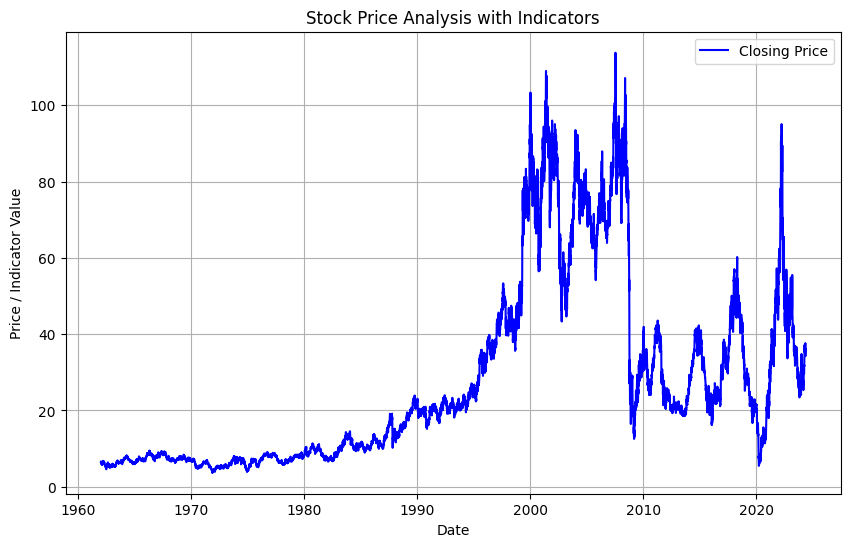

In [9]:
plt.figure(figsize=(10, 6))
plt.plot(stock_prices_df.index, stock_prices_df['Close'], label='Closing Price', color='b')
plt.xlabel('Date')
plt.ylabel('Price / Indicator Value')
plt.title('Stock Price Analysis with Indicators')
plt.grid(True)
plt.legend()

# Show the plot
plt.show()

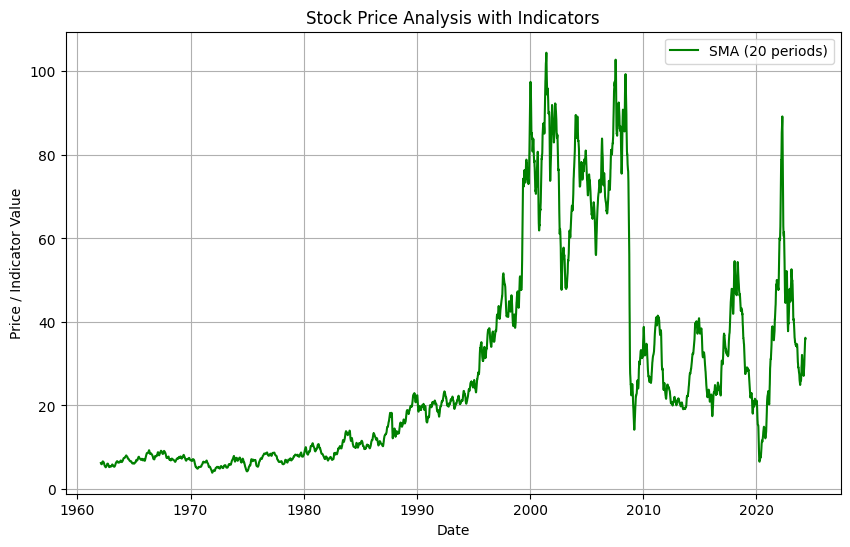

In [10]:
# Plot the SMA
plt.figure(figsize=(10, 6))
plt.plot(stock_prices_df.index, stock_prices_df['SMA'], label='SMA (20 periods)', color='g')
plt.xlabel('Date')
plt.ylabel('Price / Indicator Value')
plt.title('Stock Price Analysis with Indicators')
plt.grid(True)
plt.legend()

# Show the plot
plt.show()

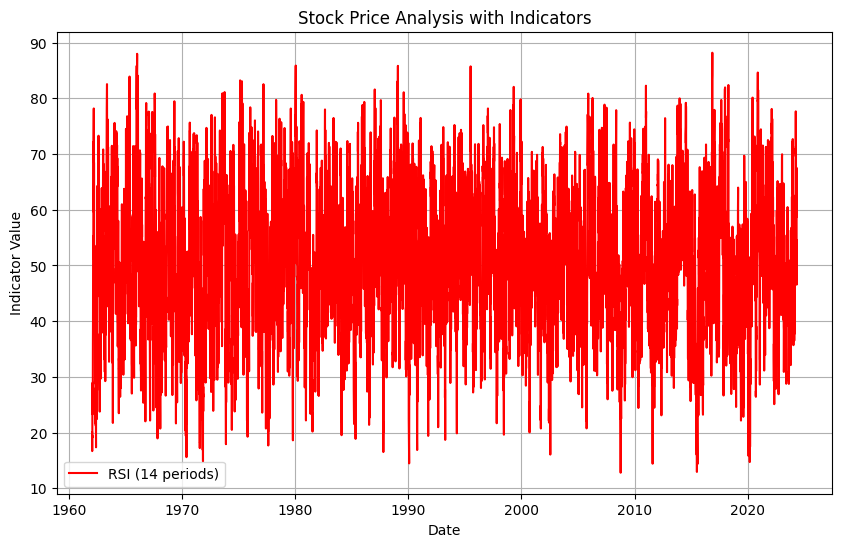

In [11]:
# Plot the RSI
plt.figure(figsize=(10, 6))
plt.plot(stock_prices_df.index, stock_prices_df['RSI'], label='RSI (14 periods)', color='r')
plt.xlabel('Date')
plt.ylabel('Indicator Value')
plt.title('Stock Price Analysis with Indicators')
plt.grid(True)
plt.legend()

# Show the plot
plt.show()

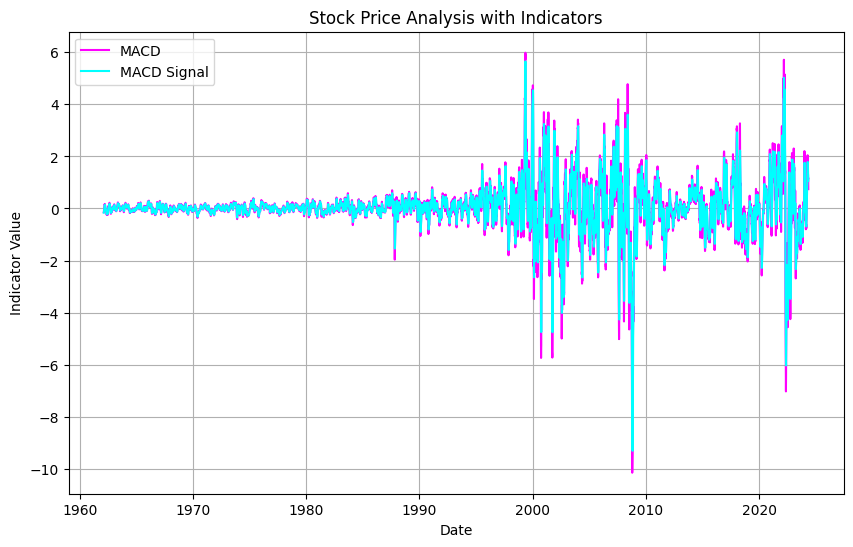

In [12]:
# Plot the MACD and its signal line
plt.figure(figsize=(10, 6))
plt.plot(stock_prices_df.index, stock_prices_df['MACD'], label='MACD', color='magenta')
plt.plot(stock_prices_df.index, stock_prices_df['MACD_signal'], label='MACD Signal', color='cyan')
# Add labels and title
plt.xlabel('Date')
plt.ylabel('Indicator Value')
plt.title('Stock Price Analysis with Indicators')
plt.grid(True)
plt.legend()

# Show the plot
plt.show()

In [17]:
# Plot the Bollinger Bands
plt.figure(figsize=(10, 6))
plt.plot(stock_prices_df.index, stock_prices_df['Upper_Band'], label='Upper Bollinger Band', linestyle='--', color='purple')
plt.plot(stock_prices_df.index, stock_prices_df['Lower_Band'], label='Lower Bollinger Band', linestyle='--', color='black')
plt.xlabel('Date')
plt.ylabel('Indicator Value')
plt.title('Stock Price Analysis with Indicators')
plt.grid(True)
plt.legend()

# Show the plot
plt.show()

KeyError: 'Upper_Band'

<Figure size 1000x600 with 0 Axes>

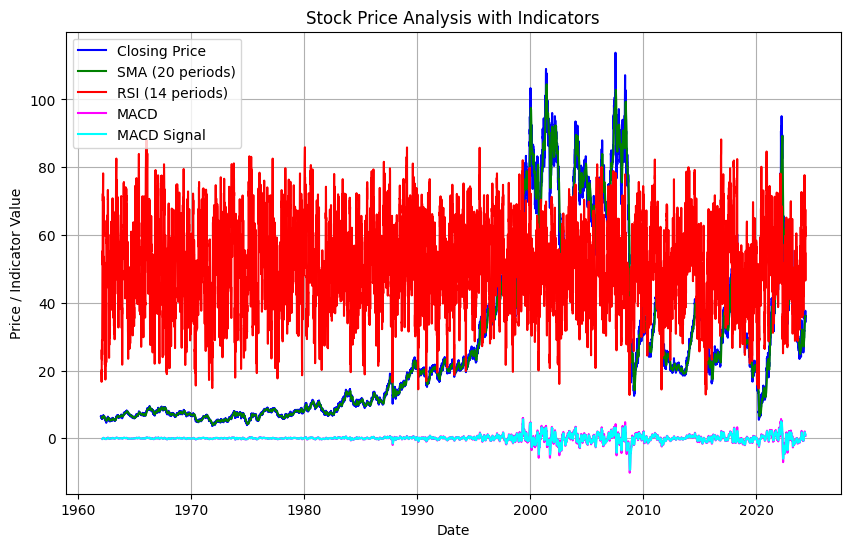

In [14]:

# Create a new figure
plt.figure(figsize=(10, 6))

# Plot the closing price
plt.plot(stock_prices_df.index, stock_prices_df['Close'], label='Closing Price', color='b')

# Plot the SMA
plt.plot(stock_prices_df.index, stock_prices_df['SMA'], label='SMA (20 periods)', color='g')

# Plot the RSI
plt.plot(stock_prices_df.index, stock_prices_df['RSI'], label='RSI (14 periods)', color='r')


# Plot the MACD and its signal line
plt.plot(stock_prices_df.index, stock_prices_df['MACD'], label='MACD', color='magenta')
plt.plot(stock_prices_df.index, stock_prices_df['MACD_signal'], label='MACD Signal', color='cyan')

# Add labels and title
plt.xlabel('Date')
plt.ylabel('Price / Indicator Value')
plt.title('Stock Price Analysis with Indicators')
plt.grid(True)
plt.legend()

# Show the plot
plt.show()


In [18]:
stock_prices_df.to_csv('stock_prices_df.csv')